In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [38]:
#reading input file for splitting to train and test
df_train = pd.read_csv('/Users/karunparashar/Downloads/mtx/Train_rsmpl.csv')
df = df_train.copy(deep=True)
X_resampled = df.iloc[:,0:52]
y_resampled = df.iloc[:,52]
x_train, x_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.8,test_size=0.2,
                                                    random_state = 7)

In [5]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#defining base classifier
gbm=  GradientBoostingClassifier()

#parameters to be tuned
param_grid_GBM = {'learning_rate':[0.01,0.1],
                  "n_estimators" : [100,1000]}

#grid search initialisation                  
grid_gbm = RandomizedSearchCV(gbm, param_grid_GBM, cv = 2,verbose = 3)

#training on model created using grid search
GBM_model = grid_gbm.fit(x_train, y_train)

#predictions based on this model
grid_predictions_GBM = GBM_model.predict(x_test) 

#calculating accuracy
GBM_acc_grid = accuracy_score(y_test,grid_predictions_GBM)


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] n_estimators=100, learning_rate=0.01 ............................
[CV]  n_estimators=100, learning_rate=0.01, score=0.6970382362744632, total= 1.1min
[CV] n_estimators=100, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  n_estimators=100, learning_rate=0.01, score=0.6913900661936283, total=  59.7s
[CV] n_estimators=1000, learning_rate=0.01 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min remaining:    0.0s


[CV]  n_estimators=1000, learning_rate=0.01, score=0.8134374553592686, total=11.6min
[CV] n_estimators=1000, learning_rate=0.01 ...........................
[CV]  n_estimators=1000, learning_rate=0.01, score=0.8083956378875184, total=11.3min
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV]  n_estimators=100, learning_rate=0.1, score=0.8127232036569687, total=  54.4s
[CV] n_estimators=100, learning_rate=0.1 .............................
[CV]  n_estimators=100, learning_rate=0.1, score=0.8108243249678556, total=  54.8s
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV]  n_estimators=1000, learning_rate=0.1, score=0.8859101947526308, total= 8.9min
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV]  n_estimators=1000, learning_rate=0.1, score=0.8878041811514834, total= 8.9min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 45.3min finished


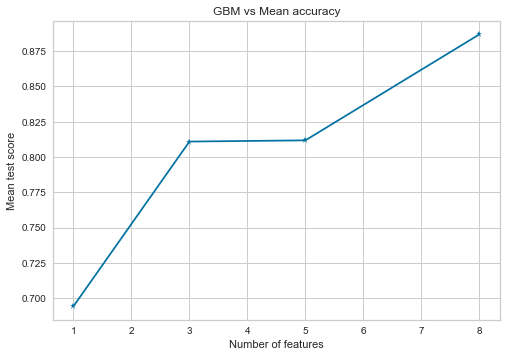

In [27]:
# visualising results based on cross validation by grid search
GBM_grid_results =grid_gbm.cv_results_
plt.plot(np.array([1,3,5,8]),GBM_grid_results['mean_test_score'],marker='*')
plt.title('GBM vs Mean accuracy')
plt.xlabel('Number of features') 
plt.ylabel('Mean test score') 
plt.show()

Now we will check the performance of our model against the test resampled data:

In [41]:
#test accuracy check
df_test = pd.read_csv('/Users/karunparashar/Downloads/mtx/Tst_rsmpl.csv')
x_tet = df_test.iloc[:,0:52]
y_tet = df_test.iloc[:,52]
accuracy_score(GBM_model.predict(x_tet),y_tet)

0.8813032537886285


Extracting the best parameters from the trained model using grid search

In [35]:
df_gbm= pd.DataFrame(data = GBM_grid_results)
best_params = df_gbm.params[df_gbm.rank_test_score ==1]
best_params

//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.

3    {'n_estimators': 1000, 'learning_rate': 0.1}
Name: params, dtype: object

Now we know the best parameter metrics of our best fitted model, let's use it to plot a classification report of our own

In [36]:
cr = classification_report(GBM_model.predict(x_tet),y_tet)
print(cr)

               precision    recall  f1-score   support

     Ascomoid       0.80      0.81      0.81     14830
Assassin vine       0.74      0.82      0.78     13470
   Basidirond       0.83      0.92      0.87     13470
    Dark tree       0.99      0.95      0.97     15664
 Hangman tree       0.98      0.91      0.94     16200
       Kelpie       0.92      0.85      0.88     16218
      Myconid       0.97      0.96      0.97     15302

    micro avg       0.89      0.89      0.89    105154
    macro avg       0.89      0.89      0.89    105154
 weighted avg       0.89      0.89      0.89    105154

